In [2]:
%matplotlib inline 
import pandas as pd
import numpy as np

In [3]:
# load the dataset
energy = pd.read_csv("./data/all_energy_statistics.csv")

In [4]:
# look at the data
energy.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [44]:
len(energy[energy['year']>2010]['country_or_area'].unique())

231

In [71]:
wind = energy[energy['commodity_transaction']=="Wind – Main activity"].pivot_table(index="country_or_area", columns="year", values="quantity")

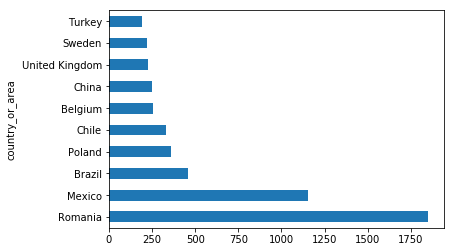

In [99]:
growth = wind.sort_values(by=2014, ascending=False).head(30).iloc[:,-5::4].apply(lambda c: (c[2014] - c[2010]) / c[2010] * 100, axis=1).sort_values(ascending=False).head(10).plot(kind='barh')

In [97]:
growth.sort_values(ascending=False)

country_or_area
Romania           1847.666667
Mexico            1151.204819
Brazil             460.771704
Poland             361.298077
Chile              328.915663
Belgium            258.001561
China              249.778136
United Kingdom     226.059942
Sweden             220.788121
Turkey             192.278655
Morocco            191.957511
Canada             156.936482
Norway             152.104664
Australia          102.929533
Bulgaria            95.447871
United States       93.133751
Austria             86.337209
Ireland             82.593250
France              68.391594
Denmark             67.486234
Italy               66.388950
Other Asia          53.688525
Germany             52.112340
Netherlands         46.175031
Greece              35.924834
New Zealand         35.495716
India               33.909795
Portugal            31.899368
Spain               17.500847
Egypt              -12.216288
dtype: float64

In [18]:
set([x for x in energy['commodity_transaction'].unique()])

{'Sub-bituminous coal - Consumption by construction industry',
 'Brown coal briquettes - production',
 'Other kerosene - Own use by oil and gas extraction',
 'Other kerosene - Own use by electricity, CHP and heat plants',
 'Other oil products n.e.c. - production from refineries',
 'Other bituminous coal - consumption by rail',
 'Tide, wave and marine – Main activity',
 'Bagasse - Consumption by other manuf., const. and non-fuel ind.',
 'Anthracite - stock changes',
 'Electricity - Own use by coal mines',
 'Conventional crude oil - consumption by commerce and public services',
 'Nuclear – Autoproducer – CHP plants',
 'Liquefied petroleum gas (LPG) - Stock changes',
 'Peat products - Own use by briquetting plants',
 'Fuel oil - Transformation in CHP plants - main activity producers',
 'Gas Oil/ Diesel Oil - Consumption by food and tobacco ',
 'Patent fuel - Total energy supply',
 'Coal Tar - Consumption by other manufacturing, construction and non-fuel mining industry',
 'Natural Gas (in

In [41]:
set([x for x in energy['commodity_transaction'].unique() if x.startswith("Wind")])

{'Wind – Autoproducer', 'Wind – Main activity'}